In [75]:
# Import dependencies 
import os
import csv 
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime

In [76]:
#Store filepath in a variable 
fedfunds_path = "Resources/FEDFUNDS.csv"
sales_path = "sales_price_clean_csv"


In [77]:
#Read the FedFund data
fedfunds_dt = pd.read_csv(fedfunds_path)
fedfunds_dt

,DATE,FEDFUNDS
0,2019-01-01,2.40
1,2019-02-01,2.40
2,2019-03-01,2.41
3,2019-04-01,2.42
4,2019-05-01,2.39
...,...,...
60,2024-01-01,5.33
61,2024-02-01,5.33
62,2024-03-01,5.33
63,2024-04-01,5.33


In [78]:
# Read the sales data
sales_dt = pd.read_csv(sales_path).rename(columns={"Month":"DATE"})
sales_dt

,DATE,National,"Austin, TX","Idaho Falls, ID","Pine Bluff, AR","Shreveport,LA"
0,2019-01-01,273,342,195,50,155
1,2019-02-01,276,347,177,40,120
2,2019-03-01,284,365,185,60,153
3,2019-04-01,290,380,186,88,150
4,2019-05-01,299,392,195,84,150
...,...,...,...,...,...,...
59,2023-12-01,402,520,330,76,189
60,2024-01-01,402,500,299,100,170
61,2024-02-01,412,524,345,60,170
62,2024-03-01,420,550,330,126,172


In [79]:
# Combine the data into a single DataFrame
data= pd.merge(fedfunds_dt, sales_dt, how= "left", on= "DATE")
data

,DATE,FEDFUNDS,National,"Austin, TX","Idaho Falls, ID","Pine Bluff, AR","Shreveport,LA"
0,2019-01-01,2.40,273.0,342.0,195.0,50.0,155.0
1,2019-02-01,2.40,276.0,347.0,177.0,40.0,120.0
2,2019-03-01,2.41,284.0,365.0,185.0,60.0,153.0
3,2019-04-01,2.42,290.0,380.0,186.0,88.0,150.0
4,2019-05-01,2.39,299.0,392.0,195.0,84.0,150.0
...,...,...,...,...,...,...,...
60,2024-01-01,5.33,402.0,500.0,299.0,100.0,170.0
61,2024-02-01,5.33,412.0,524.0,345.0,60.0,170.0
62,2024-03-01,5.33,420.0,550.0,330.0,126.0,172.0
63,2024-04-01,5.33,434.0,575.0,353.0,98.0,200.0


In [90]:
data.dropna()

,DATE,FEDFUNDS,National,"Austin, TX","Idaho Falls, ID","Pine Bluff, AR","Shreveport,LA"
0,2019-01-01,2.40,273.0,342.0,195.0,50.0,155.0
1,2019-02-01,2.40,276.0,347.0,177.0,40.0,120.0
2,2019-03-01,2.41,284.0,365.0,185.0,60.0,153.0
3,2019-04-01,2.42,290.0,380.0,186.0,88.0,150.0
4,2019-05-01,2.39,299.0,392.0,195.0,84.0,150.0
...,...,...,...,...,...,...,...
59,2023-12-01,5.33,402.0,520.0,330.0,76.0,189.0
60,2024-01-01,5.33,402.0,500.0,299.0,100.0,170.0
61,2024-02-01,5.33,412.0,524.0,345.0,60.0,170.0
62,2024-03-01,5.33,420.0,550.0,330.0,126.0,172.0


In [88]:
fedfunds_dt["FEDFUNDS"].count

<bound method Series.count of 0     2.40
1     2.40
2     2.41
3     2.42
4     2.39
      ... 
60    5.33
61    5.33
62    5.33
63    5.33
64    5.33
Name: FEDFUNDS, Length: 65, dtype: float64>

In [81]:
sales_dt["National"].count()

64

In [82]:
Datedf= pd.read_csv("sales_price_clean_csv")
Datedf

,Month,National,"Austin, TX","Idaho Falls, ID","Pine Bluff, AR","Shreveport,LA"
0,2019-01-01,273,342,195,50,155
1,2019-02-01,276,347,177,40,120
2,2019-03-01,284,365,185,60,153
3,2019-04-01,290,380,186,88,150
4,2019-05-01,299,392,195,84,150
...,...,...,...,...,...,...
59,2023-12-01,402,520,330,76,189
60,2024-01-01,402,500,299,100,170
61,2024-02-01,412,524,345,60,170
62,2024-03-01,420,550,330,126,172


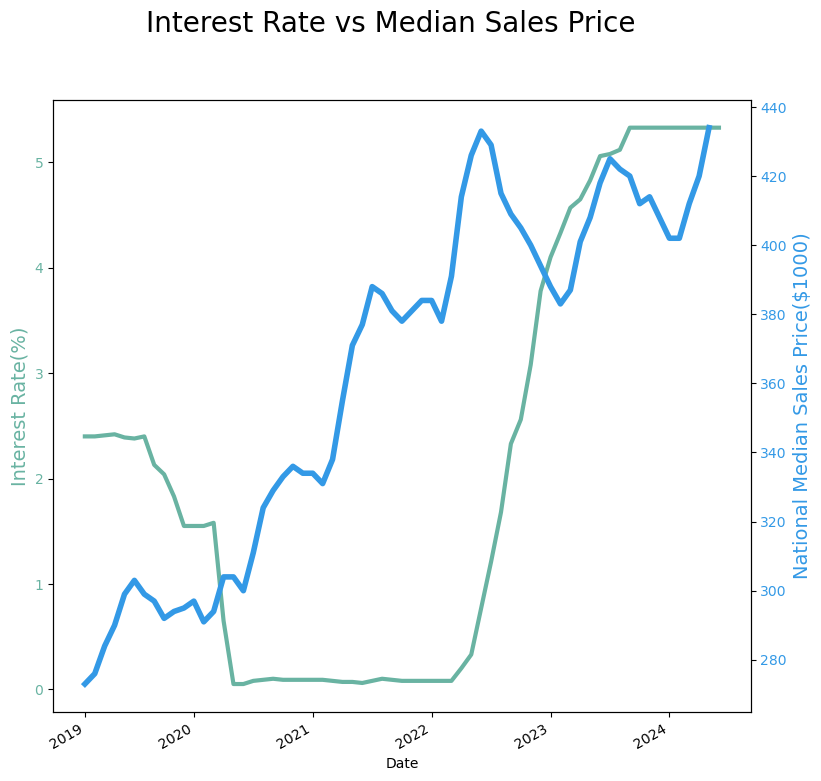

In [96]:
fedfund_color = "#69b3a2"
sales_color = "#3399e6"

fig, ax1 = plt.subplots(figsize=(9, 9))
ax2 = ax1.twinx()

ax1.plot(data["DATE"],data["FEDFUNDS"],color=fedfund_color, lw=3)
ax2.plot(data["DATE"],data["National"], color= sales_color, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Interest Rate(%)", color=fedfund_color, fontsize=14)
ax1.tick_params(axis="y", labelcolor=fedfund_color)

ax2.set_ylabel("National Median Sales Price($1000)", color=sales_color, fontsize=14)
ax2.tick_params(axis="y", labelcolor=sales_color)

fig.suptitle("Interest Rate vs Median Sales Price", fontsize=20)
fig.autofmt_xdate()

x1=[0,11,23,35,47,59]
labels = [2019, 2020, 2021, 2022, 2023, 2024]
plt.xticks(x1, labels,rotation=45)

plt.savefig("Interest Rate vs Median Sales Price.png")
plt.show()